### Problem Understanding 
### Hypothesis Generation

### load packages

In [58]:
#Loading libraries 
import warnings
import re
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm
warnings.filterwarnings('ignore')

In [59]:
sns.set_style('whitegrid')
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

### Get Data

In [60]:
#make a copy of original data
trainOriginal = pd.read_excel('data/Data_Train.xlsx')
testOriginal = pd.read_excel('data/Test_set.xlsx')

In [61]:
#loading data
train = pd.read_excel('data/Data_Train.xlsx')
test = pd.read_excel('data/Test_set.xlsx')

In [62]:
train.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [64]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


###  Data Understanding

| Column          | Details                                                 |
|-----------------|---------------------------------------------------------|
| Airline         | The name of the airline                                 |
| Date_of_Journey | The date of the journey                                 |
| Source          | The source from which the service begins.               |
| Destination     | The destination where the service ends.                 |
| Route           | The route taken by the flight to reach the destination. |
| Dep_Time        | The time when the journey starts from the source.       |
| Arrival_Time    | Time of arrival at the destination.                     |
| Duration        | Total duration of the flight.                           |
| Total_Stops     | Total stops between the source and destination.         |
| Additional_Info | Additional information about the flight.                |
| Price           | The price of the ticket.                                |

### Inspect Data

In [30]:
#check rows and columns
print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The train data has 10683 rows and 11 columns
----------------------------
The test data has 2671 rows and 10 columns


In [ ]:
data = train.append(test, ignore_index=False)
# bigdata = pd.concat([data1, data2], ignore_index=True) particularly helpful when you are joining more than two dataframes:
print(data.shape)
print(data.info())

In [32]:
train.iloc[10682:10683,:] # display train data frame last row 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [33]:
data.iloc[10682:10683,:] # display train data frame last row in data data frame

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
10682,No info,Air India,19:15,9/05/2019,10:55,Cochin,8h 20m,11753.0,DEL → GOI → BOM → COK,Delhi,2 stops


### Exporting Combined dataset to working directory

In [34]:
data.to_csv('data/data.csv')

In [35]:
print(data.head())
print(data.tail())

  Additional_Info      Airline  Arrival_Time Date_of_Journey Dep_Time  \
0         No info       IndiGo  01:10 22 Mar      24/03/2019    22:20   
1         No info    Air India         13:15       1/05/2019    05:50   
2         No info  Jet Airways  04:25 10 Jun       9/06/2019    09:25   
3         No info       IndiGo         23:30      12/05/2019    18:05   
4         No info       IndiGo         21:35      01/03/2019    16:50   

  Destination Duration    Price                  Route    Source Total_Stops  
0   New Delhi   2h 50m   3897.0              BLR → DEL  Banglore    non-stop  
1    Banglore   7h 25m   7662.0  CCU → IXR → BBI → BLR   Kolkata     2 stops  
2      Cochin      19h  13882.0  DEL → LKO → BOM → COK     Delhi     2 stops  
3    Banglore   5h 25m   6218.0        CCU → NAG → BLR   Kolkata      1 stop  
4   New Delhi   4h 45m  13302.0        BLR → NAG → DEL  Banglore      1 stop  
     Additional_Info            Airline  Arrival_Time Date_of_Journey  \
2666         N

### Data Exploration

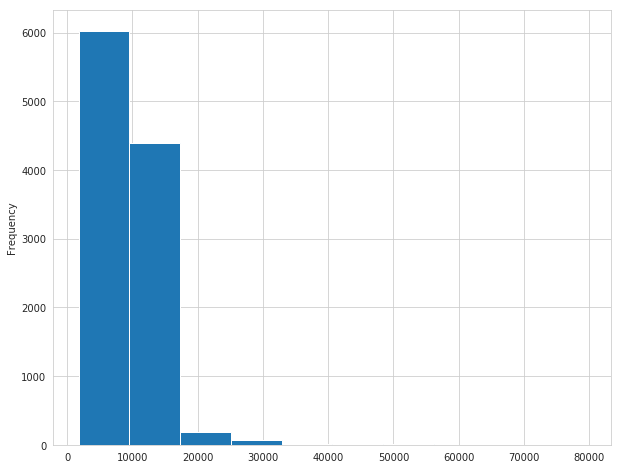

In [36]:
data['Price'].plot(kind='hist');

### Missing values

In [37]:
# Let's check if the data set has any missing values.

#check missing values
data.columns[data.isnull().any()]

Index(['Price', 'Route', 'Total_Stops'], dtype='object')

In [38]:
#missing value counts in each of these columns
miss = data.isnull().sum()/len(data)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Route          0.000075
Total_Stops    0.000075
Price          0.200015
dtype: float64

In [39]:
data['Route'].fillna(data['Route'].mode()[0], inplace=True) 
data['Total_Stops'].fillna(data['Total_Stops'].mode()[0], inplace=True) 

In [40]:
# Replace using median 
median = data['Price'].median()
data['Price'].fillna(median, inplace=True)

In [41]:
#check missing values again
data.columns[data.isnull().any()]

Index([], dtype='object')

### Outliers

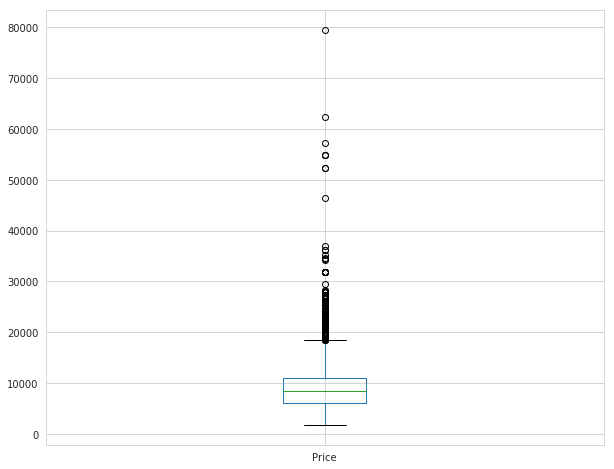

In [42]:
data.plot(kind='box')

### Handling Date and Time Variables

In [43]:
#Cleaning Journey Date 

#Training Set

data['Journey_Day'] = pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.day

data['Journey_Month'] = pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.month

# Compare the dates and delete the original date feature

data.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)
data.head()

,Additional_Info,Airline,Arrival_Time,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Journey_Day,Journey_Month
0,No info,IndiGo,01:10 22 Mar,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop,24,3
1,No info,Air India,13:15,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,1,5
2,No info,Jet Airways,04:25 10 Jun,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,9,6
3,No info,IndiGo,23:30,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,12,5
4,No info,IndiGo,21:35,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,1,3


In [44]:
# Cleaning Duration

# Training Set

duration = list(data['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
data['Duration_hours'] = dur_hours
data['Duration_minutes'] =dur_minutes

data.drop(labels = 'Duration', axis = 1, inplace = True)

data.head()

,Additional_Info,Airline,Arrival_Time,Dep_Time,Destination,Price,Route,Source,Total_Stops,Journey_Day,Journey_Month,Duration_hours,Duration_minutes
0,No info,IndiGo,01:10 22 Mar,22:20,New Delhi,3897.0,BLR → DEL,Banglore,non-stop,24,3,2,50
1,No info,Air India,13:15,05:50,Banglore,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,1,5,7,25
2,No info,Jet Airways,04:25 10 Jun,09:25,Cochin,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,9,6,19,0
3,No info,IndiGo,23:30,18:05,Banglore,6218.0,CCU → NAG → BLR,Kolkata,1 stop,12,5,5,25
4,No info,IndiGo,21:35,16:50,New Delhi,13302.0,BLR → NAG → DEL,Banglore,1 stop,1,3,4,45


In [45]:
#Cleaning Departure and Arrival Times

# Training Set


data['Depart_Time_Hour'] = pd.to_datetime(data.Dep_Time).dt.hour
data['Depart_Time_Minutes'] = pd.to_datetime(data.Dep_Time).dt.minute

data.drop(labels = 'Dep_Time', axis = 1, inplace = True)
data.head()

,Additional_Info,Airline,Arrival_Time,Destination,Price,Route,Source,Total_Stops,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes
0,No info,IndiGo,01:10 22 Mar,New Delhi,3897.0,BLR → DEL,Banglore,non-stop,24,3,2,50,22,20
1,No info,Air India,13:15,Banglore,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,1,5,7,25,5,50
2,No info,Jet Airways,04:25 10 Jun,Cochin,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,9,6,19,0,9,25
3,No info,IndiGo,23:30,Banglore,6218.0,CCU → NAG → BLR,Kolkata,1 stop,12,5,5,25,18,5
4,No info,IndiGo,21:35,New Delhi,13302.0,BLR → NAG → DEL,Banglore,1 stop,1,3,4,45,16,50


In [46]:
data['Arr_Time_Hour'] = pd.to_datetime(data.Arrival_Time).dt.hour
data['Arr_Time_Minutes'] = pd.to_datetime(data.Arrival_Time).dt.minute

data.drop(labels = 'Arrival_Time', axis = 1, inplace = True)
data.head()

,Additional_Info,Airline,Destination,Price,Route,Source,Total_Stops,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,No info,IndiGo,New Delhi,3897.0,BLR → DEL,Banglore,non-stop,24,3,2,50,22,20,1,10
1,No info,Air India,Banglore,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,1,5,7,25,5,50,13,15
2,No info,Jet Airways,Cochin,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,9,6,19,0,9,25,4,25
3,No info,IndiGo,Banglore,6218.0,CCU → NAG → BLR,Kolkata,1 stop,12,5,5,25,18,5,23,30
4,No info,IndiGo,New Delhi,13302.0,BLR → NAG → DEL,Banglore,1 stop,1,3,4,45,16,50,21,35


### Handling Categorical Variables

In [47]:
# to get categorical values count
l = ['Additional_Info', 'Airline', 'Destination', 'Route', 'Source','Total_Stops']
print([data[i].value_counts() for i in l])

[No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
2 Long layover                      1
1 Short layover                     1
Red-eye flight                      1
Name: Additional_Info, dtype: int64, Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64, Cochin       5682
Banglore     3581
Delhi        

In [48]:
print([len(data[i].value_counts()) for i in l])

[10, 12, 6, 132, 5, 5]


In [49]:
data.head()

,Additional_Info,Airline,Destination,Price,Route,Source,Total_Stops,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,No info,IndiGo,New Delhi,3897.0,BLR → DEL,Banglore,non-stop,24,3,2,50,22,20,1,10
1,No info,Air India,Banglore,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,1,5,7,25,5,50,13,15
2,No info,Jet Airways,Cochin,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,9,6,19,0,9,25,4,25
3,No info,IndiGo,Banglore,6218.0,CCU → NAG → BLR,Kolkata,1 stop,12,5,5,25,18,5,23,30
4,No info,IndiGo,New Delhi,13302.0,BLR → NAG → DEL,Banglore,1 stop,1,3,4,45,16,50,21,35


#### label Encoding 

In [51]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()

# Training Set    

data.iloc[:,0] = le1.fit_transform(data.iloc[:,0])

data.iloc[:,1] = le1.fit_transform(data.iloc[:,1])

data.iloc[:,2] = le1.fit_transform(data.iloc[:,2])

data.iloc[:,4] = le1.fit_transform(data.iloc[:,4])

data.iloc[:,5] = le1.fit_transform(data.iloc[:,5])

data.iloc[:,6] = le1.fit_transform(data.iloc[:,6])


In [53]:
print(data.head())
print(data.shape)

   Additional_Info  Airline  Destination    Price  Route  Source  Total_Stops  \
0                8        3            5   3897.0     18       0            4   
1                8        1            0   7662.0     87       3            1   
2                8        4            1  13882.0    122       2            1   
3                8        3            0   6218.0     95       3            0   
4                8        3            5  13302.0     29       0            0   

   Journey_Day  Journey_Month  Duration_hours  Duration_minutes  \
0           24              3               2                50   
1            1              5               7                25   
2            9              6              19                 0   
3           12              5               5                25   
4            1              3               4                45   

   Depart_Time_Hour  Depart_Time_Minutes  Arr_Time_Hour  Arr_Time_Minutes  
0                22               

#### One Hot Encoding  (dummy variables)

In [ ]:
# dummiesDF = pd.get_dummies(data)
# dummiesDF.head()
# merged = pd.concat([data,dummiesDF], axis ='columns')
# merged.head()
# final = merged.drop(['Additional_Info', 'Airline', 'Destination', 'Route', 'Source','Total_Stops'], axis ='columns')
# pd.set_option('display.max_columns', 500)
# final.head()

In [ ]:
# we have to drop one of the dummy variables (dummy variable trap: since these variables become multi coliniority 
# when we derived dummy variables from any variables, for linear regression model no need to drop one of dummy variables
# since lR model aware of dummy variables itself drop it)
# print(final.info())

### Data Pre-Processing
### Feature Engineering

### Model Training - XGBoost, Neural Network, Lasso

In [57]:
# data.iloc[10682:10683,:]
# data.iloc[10682:10683,:]

train = data.iloc[0:10683,:]
train.tail()

,Additional_Info,Airline,Destination,Price,Route,Source,Total_Stops,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
10678,8,0,0,4107.0,67,3,4,9,4,2,30,19,55,22,25
10679,8,1,0,4145.0,67,3,4,27,4,2,35,20,45,23,20
10680,8,4,2,7229.0,18,0,4,27,4,3,0,8,20,11,20
10681,8,10,5,12648.0,18,0,4,1,3,2,40,11,30,14,10
10682,8,1,1,11753.0,112,2,1,9,5,8,20,10,55,19,15


In [65]:
test = data.iloc[10684:,:]
test.head()

,Additional_Info,Airline,Destination,Price,Route,Source,Total_Stops,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
1,8,3,0,8372.0,94,3,0,12,5,4,0,6,20,10,20
2,5,4,1,8372.0,108,2,0,21,5,23,45,19,15,19,0
3,8,6,1,8372.0,108,2,0,21,5,13,0,8,0,21,0
4,8,0,2,8372.0,18,0,4,24,6,2,50,23,55,2,45
5,5,4,1,8372.0,108,2,0,12,6,18,20,18,15,12,35


### Model Evaluation